<a href="https://colab.research.google.com/github/SuperZarija/Feature-selection-and-classification-of-breast-MRI-scans/blob/main/BigData_project_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Big Data data analytics - Feature selection and classification of MRI images
# Teodora Jezdimirović E1 99/2022
# Aleksandra Zarija E1 98/2022

In [ ]:
# Loading table Annotation_Boxes.xls which contains data regarding slices with leasions and their coordinates
import pandas as pd

excel_data = pd.read_excel('D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\Annotation Boxes\Annotation_Boxes.xlsx')

# Printnig first 5 rows of the table excel_data
excel_data.head()


,Patient ID,Start Row,End Row,Start Column,End Column,Start Slice,End Slice
0,Breast_MRI_001,234,271,308,341,89,112
1,Breast_MRI_002,251,294,108,136,59,72
2,Breast_MRI_003,351,412,82,139,96,108
3,Breast_MRI_004,262,280,193,204,86,95
4,Breast_MRI_005,188,213,138,178,76,122


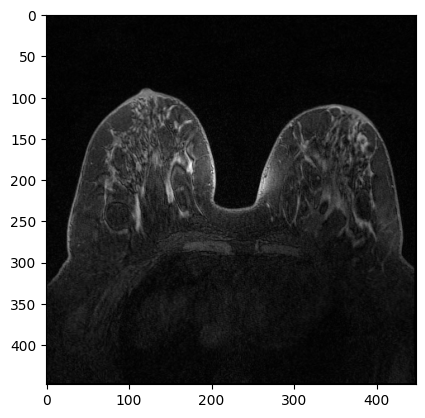

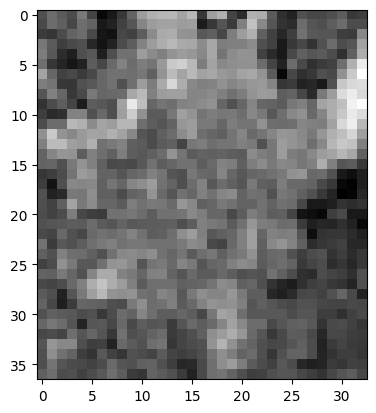

In [ ]:
import pydicom as dicom
import matplotlib.pyplot as plt

# s -> start_slice and e -> end_slice
start_slice = excel_data.loc[0, "Start Slice"] # first slice from the series which contains leasion
end_slice = excel_data.loc[0, "End Slice"] # last slice from the series which contains leasion

# Leasion coordinates
sr = excel_data.loc[0, "Start Row"]
er = excel_data.loc[0, "End Row"]
sc = excel_data.loc[0, "Start Column"]
ec = excel_data.loc[0, "End Column"]

# Ploting central slice from the group of slices with leasions on them BEFORE
# contrast injection (that slice is choosen under the assumption that the leasion
# is most visible on it)
center_slice = (start_slice + end_slice) // 2
image_path = f'D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\manifest-1692107233161\Duke-Breast-Cancer-MRI\Breast_MRI_001\\01-01-1990-NA-MRI BREAST BILATERAL WWO-97538\\3.000000-ax dyn pre-93877\\1-{center_slice:03d}.dcm'

ds = dicom.dcmread(image_path) # loading an image of the central slice in dicom format
plt.imshow(ds.pixel_array, cmap='gray') # ds.pixel_array is a picture of the central slice
plt.show()

segment = ds.pixel_array[sr:er, sc:ec] # part of the picture containing the leasion
plt.imshow(segment, cmap='gray')
plt.show()

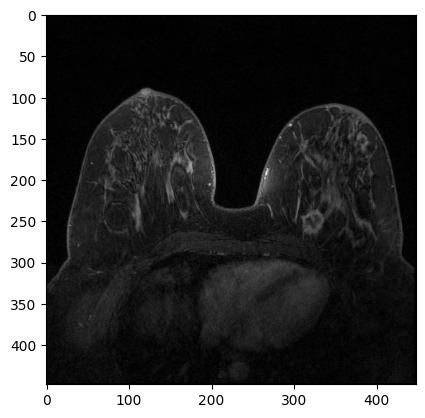

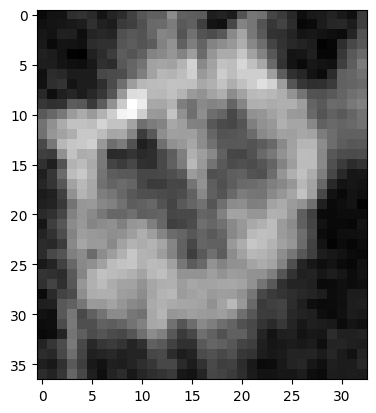

In [ ]:
# Ploting central slice from the group of slices with leasions on them in the
# first pass AFTER the contrast injection (that slice is choosen under the
# assumption that the leasion is most visible on it)

image_path = f'D:\FTN\Master\Big data - upravljanje i analiza\Projekat\\Baza\\manifest-1692107233161\\Duke-Breast-Cancer-MRI\Breast_MRI_001\\01-01-1990-NA-MRI BREAST BILATERAL WWO-97538\\5.000000-ax dyn 1st pass-59529\\1-{center_slice:03d}.dcm'

ds = dicom.dcmread(image_path) # loading an image of the central slice in dicom format
plt.imshow(ds.pixel_array, cmap='gray') # ds.pixel_array is a picture of the central slice
plt.show()

segment = ds.pixel_array[sr:er, sc:ec] # part of the picture containing the leasion
plt.imshow(segment, cmap='gray')
plt.show()

In [ ]:
# Loading data from Excel file Breast-Cancer-MRI-filepath_filename-mapping.xls which will help us map different file paths
# da li ostaviti ili izmeniti: Path mapping file (loading paths from Excel file Breast-Cancer-MRI-filepath_filename-mapping.xls)

csv_data = pd.read_excel('D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\File Path mapping tables\Breast-Cancer-MRI-filepath_filename-mapping.xlsx')

csv_data.head() # printnig first 5 rows of the table csv_data

,sop_instance_UID,original_path_and_filename,classic_path,descriptive_path,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,series_sort
0,1.3.6.1.4.1.14519.5.2.1.1805789812895034139917...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.dcm
1,1.3.6.1.4.1.14519.5.2.1.4903237729147735321973...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.3.6.1.4.1.14519.5.2.1.3061160038794820079325...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.3.6.1.4.1.14519.5.2.1.1574717199045785031549...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.3.6.1.4.1.14519.5.2.1.2594404476894572978078...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Selecting slices containing leasions only from folders with images before
# contrast and first 3 passes after contrast
# (folders: pre, post_1, post_2, post_3)

import os         # required for navigating to the input data
import numpy as np
from skimage import io

load_root = "D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\manifest-1693924493431\\" # the starting segment of the path from which slices will be loaded
save_root = "D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\izdvojeni_slajsevi\\"     # the starting segment of the path on which slices will be saved

sub_folders = ["DICOM_Images", "lesion_masks", "non_lesion_masks"] # folders which will contain slices with leasions, masks that determine where the lesions are located and masks simetrical to them?

for i in range(csv_data.shape[0]):                                # itertate through rows of csv_data

    original_path = csv_data.loc[i, "original_path_and_filename"].replace("/", "\\") # da li je potrebno? ubaceno zbog jupitera, jer nismo mogle da dignemo bazu na kolab
    p = original_path.split("\\")[2] # extraction of fields containing only the pass/series number

    if p == "post_1" or p == "post_2" or p == "post_3" or p == "pre":

        current_slice = int(original_path[-7:].split(".")[0]) # number of the current slice according to the path
        patient_num = int(original_path.split("\\")[1][-3:]) # extraction of the patient number according to the path

        # Storing the values of the first and last slice where the lesion is visible in variables
        # s -> start_slice and e -> end_slice
        start_slice = excel_data.loc[patient_num-1, "Start Slice"]
        end_slice = excel_data.loc[patient_num-1, "End Slice"]

        # Storing the leasion cordinates in variables
        sr = excel_data.loc[patient_num-1, "Start Row"]
        er = excel_data.loc[patient_num-1, "End Row"]
        sc = excel_data.loc[patient_num-1, "Start Column"]
        ec = excel_data.loc[patient_num-1, "End Column"]

        if current_slice > start_slice and current_slice < end_slice:

            # 1. Loading images from classic_path
            classic_path = csv_data.loc[i, "classic_path"].replace("/", "\\")
            load_path = load_root + classic_path
            ds = dicom.dcmread(load_path)

            for sub_f in sub_folders: # sub_f is a variable that can take one of the next values: DICOM_Images, lesion_masks, non_lesion_masks

                # 2. Making folders for storing slices/masks
                original_path = csv_data.loc[i, "original_path_and_filename"].replace("/", "\\")
                original_path = original_path.replace("DICOM_Images", sub_f)
                new_folder_path = os.path.split(save_root + original_path)[0] # path to the new folders
                #print(new_folder_path)

                if not os.path.exists(new_folder_path):
                   os.makedirs(new_folder_path)                               # making folders on the path

                # 3. Making path for storing slices/masks
                png_path = original_path[:-4] + ".png" # changing extension from dcm to png
                new_path = save_root + png_path        # path for storing slices/masks
                #print(new_path)

                # 4. Creating an image
                if sub_f == "DICOM_Images": # if it is a slice with a lesion, store it in the variable image
                    image = ds.pixel_array  # extracting an image from DICOM format
                else:                       # if it is "lesion_masks" or "non_lesion_masks"
                    image = np.zeros(ds.pixel_array.shape) # make a black image in dimensions of the image extracted form DICOM format
                    image[sr:er, sc:ec] = 255              # on the position of the leasions change colour pixels to white
                    image = image.astype('uint8')
                    if sub_f == "non_lesion_masks":
                        image = np.flip(image, axis=1) # make a symetrical mask

                # 5. Saving the result image
                io.imsave(new_path, image, check_contrast = False)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\FTN\\Master\\Big data - upravljanje i analiza\\Projekat\\Baza\\manifest-1693924493431\\Duke-Breast-Cancer-MRI\\Breast_MRI_006\\1.3.6.1.4.1.14519.5.2.1.328300639936090952030893712876783327236\\1.3.6.1.4.1.14519.5.2.1.217249379252500972745671694254571083528\\1-040.dcm'

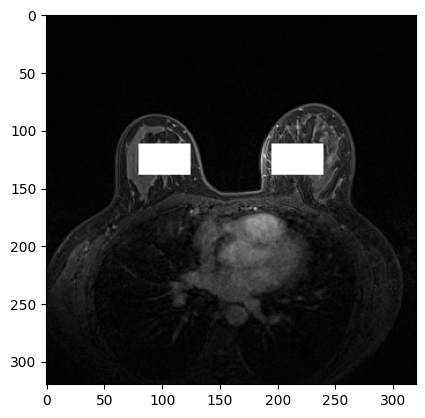

In [ ]:
# Example: Ploting combined images of leasion, mask and symetrical mask

patient_num = 2 #  1;  2;  3;   4;  5
slice_num = 65 # 100; 65; 102; 90; 99

img_path = f"D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\izdvojeni_slajsevi\DICOM_Images\Breast_MRI_{patient_num:03d}\post_1\\Breast_MRI_{patient_num:03d}_post_1_{slice_num:03d}.png"
lesion_mask_path = f"D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\izdvojeni_slajsevi\lesion_masks\Breast_MRI_{patient_num:03d}\post_1\\Breast_MRI_{patient_num:03d}_post_1_{slice_num:03d}.png"
non_lesion_mask_path = f"D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\izdvojeni_slajsevi\\non_lesion_masks\Breast_MRI_{patient_num:03d}\post_1\\Breast_MRI_{patient_num:03d}_post_1_{slice_num:03d}.png"

img = io.imread(img_path)
lesion = io.imread(lesion_mask_path)
non_lesion = io.imread(non_lesion_mask_path)

new_img = img.copy()

new_img[lesion != 0] = np.max(img)      # proveri da li tu treba da ostane max? jer nema garancije da je max vrednost piksela na slici bela
new_img[non_lesion != 0] = np.max(img)

plt.figure()
plt.imshow(new_img, cmap='gray')

In [ ]:
# Loading Excel table Clinical_and_Other_Features

clinical_features = pd.read_excel('D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\Clinical and other features\Clinical_and_Other_Features.xlsx', header=1)

In [ ]:
# Extraction of radiomics features

import glob
from radiomics import featureextractor # this module is for interaction with pyradiomics package

root = "D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\izdvojeni_slajsevi\\DICOM_Images\\"

df = pd.DataFrame()

params = {}
params['label'] = 255
params['normalize'] = True  # image normalization

extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Selection of feature groups that are going to be used
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('firstorder')
extractor.enableFeatureClassByName('glcm')
extractor.enableFeatureClassByName('glszm')
extractor.enableFeatureClassByName('glrlm')

patient_list = glob.glob(f'{root}/*')
for p_path in patient_list:
    patient_num = int(p_path.split("\\")[-1][-3:])
    bilateral = clinical_features.loc[patient_num, "Bilateral Information"] # information about existence of leasions on both breasts (0 = there are no leasions on breasts, 1 = there are leasions on breasts)

    # Storing the values of the first and last slice where the lesion is visible into variables
    # s -> start_slice, e -> end_slice
    start_slice = excel_data.loc[patient_num-1, "Start Slice"]
    end_slice = excel_data.loc[patient_num-1, "End Slice"]
    central_slice = (start_slice + end_slice)//2              # finding the central slice for the specific series

    series_list = glob.glob(f'{p_path}/*/') # making a list of paths to the folder containg the series

    for sr_path in series_list:

        series_name = sr_path.split("\\")[-2] # name of the series (it can be one of the following: pre, post_1, post_2 ili post_3)

        if series_name == "pre":
            series_num = 0
        else:
            series_num = int(series_name[-1]) # series number is the last character from the series_name

        slices_list = glob.glob(f'{sr_path}/*') # list containing paths to specific slice images

        for sl_path in slices_list:             # analyzing every image

            if int(sl_path[-7:].split(".")[0]) == central_slice: # radiomics features are calculated only for the central slice, so we need to check if the current slice is the central one
                lesion_mask_path = sl_path.replace("DICOM_Images", "lesion_masks") # changing the path name to match path to lesion masks folder
                non_lesion_mask_path = sl_path.replace("DICOM_Images", "non_lesion_masks") # changing the path name to match path to non lesion masks folder

                result_lesion = extractor.execute(sl_path, lesion_mask_path) # calculating radiomics features in the case of the existing leasion (always interested in features regardnig basic mask)

                # making a dictionary containig patient number, series number, central slice number, label (for basic mask label is 1), radiomics features
                res_lesion = {"PatientNumber" : patient_num, "Series" : series_num, "CentralSlice" : central_slice, "Label" : 1, **result_lesion}

                # adding dictionary to the data frame
                df = df.append(res_lesion, ignore_index = True)

                if bilateral == 0:        # only in case there is no bilateral cancer, find radiomics features for symetrical mask

                    result_non_lesion = extractor.execute(sl_path, non_lesion_mask_path)

                    # making a dictionary containig patient number, series number, central slice number, label (for symetrical mask label is 0), radiomics features
                    res_non_lesion = {"PatientNumber" : patient_num, "Series" : series_num, "CentralSlice" : central_slice, "Label" : 0, **result_non_lesion}

                    # adding dictionary to the data frame
                    df = df.append(res_non_lesion, ignore_index = True)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [ ]:
# Adapting the table (removing columns that are not significant)

df2 = df.drop(df.iloc[:, 4:26], axis=1)

df2.head(25) # printing the first 25 rows from new data frame

# Saving data frame 2 to a csv file

df2.to_csv("D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\\features_csv.csv")

,PatientNumber,Series,CentralSlice,Label,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,1.0,1.0,100.0,1.0,30.0,148.0,11743468.0,2.7385522598879004,80.0,1.8857907897589081,...,0.8408920376778013,0.14888056354663154,4.566509173005059,250.90193313685864,0.3827316196355789,0.5305077805077806,2.1195827226193584,0.6338795721638258,12.73677663519945,0.09419112990676065
1,1.0,1.0,100.0,0.0,30.0,140.0,7084131.0,2.0995901814602442,28.0,5.1013977483908395,...,3.3150219030393613,0.20026846731236353,4.628077016743672,163.57817197425956,0.32174545933883825,0.4037674037674038,8.144120362345225,0.5760926214884041,9.972373705650053,0.12040642502444714
2,1.0,2.0,100.0,1.0,33.0,138.0,11775079.0,2.6349960344471395,68.0,2.0008733535924828,...,0.7672898199091123,0.1325365330175056,4.595642489804528,219.7909093542243,0.3542625940200287,0.5,2.599931581924375,0.6052032041103148,11.755300357112851,0.08655474777066954
3,1.0,2.0,100.0,0.0,31.0,153.0,8306701.0,2.230178129916973,31.0,5.018593574977799,...,2.0504688803257243,0.17891528287262304,4.505970564692299,199.0364080147871,0.3472199084236116,0.45843570843570847,4.7326360198578055,0.6005175409435053,11.637420535060063,0.10878783359234781
4,1.0,3.0,100.0,1.0,38.0,135.0,12039537.0,2.525384288967003,60.0,2.0773662306087353,...,0.8578389774161441,0.10072279080576815,4.589841796046897,190.49753527229132,0.3288112251394797,0.4699017199017199,3.1843468709388567,0.5824460884646788,12.196177150636494,0.06368720438362581
5,1.0,3.0,100.0,0.0,33.0,162.0,8964721.0,2.253728190246142,35.0,4.826481760394372,...,2.0961535065053254,0.15505820764599273,4.546256983581458,199.61656656648023,0.35156162101204375,0.45577395577395585,5.175301716003361,0.6073290745182205,12.741989973966916,0.0920719078935574
6,1.0,0.0,100.0,1.0,22.0,58.0,2141716.0,1.3654642589364325,18.0,3.4388249887166533,...,4.56907721102646,0.36555677431067,4.086058821216319,107.5035164884477,0.24470554673813605,0.3536036036036036,7.728993656473939,0.4855268167380841,2.5011938365291124,0.20012055700606357
7,1.0,0.0,100.0,0.0,22.0,123.0,5428046.0,2.129651240244498,26.0,5.238083815853234,...,2.538359299419815,0.3300387587299096,4.359925255526612,203.602085587735,0.3431647743604398,0.46621621621621623,3.993246310778064,0.5899365624446578,7.158843338884237,0.20730270653948124
8,2.0,1.0,65.0,1.0,256.6,1315.4,984047275.0,5.941183843729793,695.0,2.783691239554346,...,0.005558753737833402,0.004645965920078263,6.231739116829688,1001.1829826917652,0.884750380922416,0.9397840531561461,0.06571462831485383,0.9536658834777727,1287.9770501264506,0.004439448583577972
9,2.0,1.0,65.0,0.0,200.3,965.4000000000001,422072815.0,5.3126630940001816,439.5,3.62115751788875,...,0.011762003214583856,0.009088891226275521,5.709267178604072,949.440450126546,0.856372580874805,0.9204734219269104,0.09930947019142108,0.9407873548691477,524.771241005411,0.008538609554858486


In [ ]:
# Random spliting of patients without repetition
import random

total_patient_number = excel_data.shape[0] + 1 # in this case it's 923
v = np.arange(1, total_patient_number)
random.shuffle(v)
#print(v)

percentage = 0.85
num = int(len(v) * percentage)
train_indices = v[:num]
#print(train_indices)

percentage = 0.15
test_indices = v[num:]
#print(test_indices)

print("dataset size:", df2.shape)

df_train = df2[df2.PatientNumber.isin(train_indices)]
print("train size:", df_train.shape)

df_test = df2[df2.PatientNumber.isin(test_indices)]
print("test size:", df_test.shape)

dataset size: (6160, 79)
train size: (5203, 79)
test size: (957, 79)


In [ ]:
# Making csv files for training, validation i test

df_train.to_csv("D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\\features_train.csv")
df_test.to_csv("D:\FTN\Master\Big data - upravljanje i analiza\Projekat\Baza\\features_test.csv")

df_train.head(10)

NameError: ignored

In [ ]:
# Loading training, test i validation sets into pandas dataframe from csv file

df_train = pd.read_csv("features_train.csv")
df_test = pd.read_csv("features_test.csv")

df_train.head()

,Unnamed: 0,PatientNumber,Series,CentralSlice,Label,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,8,2,1,65,1,256.6,1315.4,9.840473e+08,5.941184,695.00,...,0.005559,0.004646,6.231739,1001.182983,0.884750,0.939784,0.065715,0.953666,1287.977050,0.004439
1,9,2,1,65,0,200.3,965.4,4.220728e+08,5.312663,439.50,...,0.011762,0.009089,5.709267,949.440450,0.856373,0.920473,0.099309,0.940787,524.771241,0.008539
2,10,2,2,65,1,320.0,1438.5,1.154769e+09,6.021208,717.25,...,0.005252,0.004448,6.297816,1009.750040,0.890604,0.941445,0.067629,0.955973,1383.870530,0.004282
3,11,2,2,65,0,246.3,1090.0,5.843826e+08,5.487911,523.50,...,0.010752,0.008456,5.826626,987.136310,0.877569,0.933762,0.077437,0.950124,690.980946,0.007918
4,12,2,3,65,1,257.3,1390.1,9.987784e+08,5.985637,731.50,...,0.007524,0.006092,6.272844,1004.903848,0.887458,0.940199,0.067950,0.954631,1306.107448,0.005748


In [ ]:
# Creating different combinations of data based on series to determine which
# series contributes the most to the classification

# First combination - all data from the table

# df_train_s1 = df_train

# Second combination - series before contrast injection

df_train_s2 = df_train[df_train.Series.isin([0])]
df_train_s2.head(10)

df_test_s2 = df_test[df_test.Series.isin([0])]
df_test_s2.head(10)

# Third combination - first series after contrast injection

df_train_s3 = df_train[df_train.Series.isin([1])]
df_train_s3.head(10)

df_test_s3 = df_test[df_test.Series.isin([1])]
df_test_s3.head(10)

# Fourth combination - first 3 series after contrast injection

df_train_s4 = df_train[df_train.Series.isin([1, 2, 3])]
df_train_s4.head(10)

df_test_s4 = df_test[df_test.Series.isin([1, 2, 3])]
df_test_s4.head(10)

,Unnamed: 0,PatientNumber,Series,CentralSlice,Label,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,36,6.0,1.0,43.0,1.0,450.9,4607.5,8.156214e+09,7.424539,1682.75,...,0.002709,0.002532,7.520409,970.777462,0.955685,0.976683,0.026272,0.982852,12535.824990,0.002488
1,37,6.0,2.0,43.0,1.0,530.8,5005.2,1.036426e+10,7.569084,2048.50,...,0.002219,0.002113,7.652380,974.192174,0.957652,0.978125,0.023338,0.983670,15399.362755,0.002088
2,38,6.0,3.0,43.0,1.0,534.5,5146.6,1.116259e+10,7.620132,2169.50,...,0.002914,0.002794,7.700604,974.230427,0.957232,0.978606,0.021384,0.983601,16632.572560,0.002764
4,344,51.0,1.0,107.0,1.0,182.0,1310.4,4.051335e+08,5.568117,457.25,...,0.014757,0.012162,5.927845,579.727292,0.867014,0.927778,0.087605,0.945453,880.407181,0.011576
5,345,51.0,1.0,107.0,0.0,270.9,750.3,1.842189e+08,4.732911,228.00,...,0.010565,0.008536,5.146110,568.772422,0.857305,0.920833,0.099049,0.941090,319.607962,0.008097
6,346,51.0,2.0,107.0,1.0,195.0,1450.7,4.616209e+08,5.686193,558.25,...,0.014077,0.010983,6.001754,590.004200,0.877080,0.934028,0.076815,0.950130,984.593173,0.010259
7,347,51.0,2.0,107.0,0.0,315.0,872.6,2.411208e+08,4.885215,258.00,...,0.009098,0.007415,5.263721,573.273226,0.862541,0.922222,0.104692,0.943254,388.778853,0.007059
8,348,51.0,3.0,107.0,1.0,247.8,1558.0,5.603876e+08,5.801767,690.75,...,0.010138,0.008803,6.057376,616.089154,0.902754,0.947222,0.062198,0.960866,1137.707999,0.008512
9,349,51.0,3.0,107.0,0.0,297.0,941.1,2.641711e+08,5.098635,294.75,...,0.008678,0.007184,5.442087,588.470945,0.876224,0.931250,0.088192,0.949124,479.167676,0.006868
12,420,63.0,1.0,106.0,1.0,78.0,313.0,5.537348e+08,3.381704,86.00,...,0.752411,0.042106,5.297546,4171.162138,0.470488,0.558982,3.010316,0.712200,65.340918,0.024327


In [ ]:
# Selecting columns that contain data and labels from tables for training and test

X1_train = df_train.iloc[:, 5:]
y1_train = df_train.iloc[:, 4]

X1_test = df_test.iloc[:, 5:]
y1_test = df_test.iloc[:, 4]

#
X2_train = df_train_s2.iloc[:, 5:]
y2_train = df_train_s2.iloc[:, 4]

X2_test = df_test_s2.iloc[:, 5:]
y2_test = df_test_s2.iloc[:, 4]

#
X3_train = df_train_s3.iloc[:, 5:]
y3_train = df_train_s3.iloc[:, 4]

X3_test = df_test_s3.iloc[:, 5:]
y3_test = df_test_s3.iloc[:, 4]

#
X4_train = df_train_s4.iloc[:, 5:]
y4_train = df_train_s4.iloc[:, 4]

X4_test = df_test_s4.iloc[:, 5:]
y4_test = df_test_s4.iloc[:, 4]

In [ ]:
# Printing the beginning of the table with all data (training set)
X1_train.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,256.6,1315.4,9.840473e+08,5.941184,695.00,2.783691,2305,367.339418,791.637043,762.0,...,0.005559,0.004646,6.231739,1001.182983,0.884750,0.939784,0.065715,0.953666,1287.977050,0.004439
1,200.3,965.4,4.220728e+08,5.312663,439.50,3.621158,2013,250.278292,508.638704,408.0,...,0.011762,0.009089,5.709267,949.440450,0.856373,0.920473,0.099309,0.940787,524.771241,0.008539
2,320.0,1438.5,1.154769e+09,6.021208,717.25,2.680208,2316,378.406272,869.726744,829.5,...,0.005252,0.004448,6.297816,1009.750040,0.890604,0.941445,0.067629,0.955973,1383.870530,0.004282
3,246.3,1090.0,5.843826e+08,5.487911,523.50,3.846671,2218,292.553885,601.303987,481.5,...,0.010752,0.008456,5.826626,987.136310,0.877569,0.933762,0.077437,0.950124,690.980946,0.007918
4,257.3,1390.1,9.987784e+08,5.985637,731.50,2.582188,2148,385.797265,787.813954,709.0,...,0.007524,0.006092,6.272844,1004.903848,0.887458,0.940199,0.067950,0.954631,1306.107448,0.005748


In [ ]:
# kNN klasifikacija (sci-kit learn)
#import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

# Making lists with training and test data in 4 different combinations
X_train_list = [X1_train, X2_train, X3_train, X4_train]
X_test_list = [X1_test, X2_test, X3_test, X4_test]

y_train_list = [y1_train, y2_train, y3_train, y4_train]
y_test_list = [y1_test, y2_test, y3_test, y4_test]

# Finding the best parameters for the model
parameters = {"n_neighbors" : [1, 2, 3, 5, 10], "metric" : ("euclidean", "chebyshev", "manhattan", "hamming")}

for X, y in zip(X_train_list, y_train_list):

  clf = KNeighborsClassifier()
  clf_gs = GridSearchCV(clf, parameters)

  clf_gs.fit(X, y)

  print(clf_gs.best_score_)
  print(clf_gs.best_params_)

conf_mat_list = []
acc_list = []

# kNN classification for all 4 combinations of data
for X, y, X_test, y_test in zip(X_train_list, y_train_list, X_test_list, y_test_list):

  classifier = KNeighborsClassifier(n_neighbors = clf_gs.best_params_['n_neighbors'], metric = clf_gs.best_params_['metric'])
  classifier.fit(X, y)

  y_pred = classifier.predict(X_test)

  # confusion matrices
  conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
  conf_mat_list.append(conf_mat)

  # accuracy
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

0.623994714789404
{'metric': 'euclidean', 'n_neighbors': 10}
0.5930735930735931
{'metric': 'euclidean', 'n_neighbors': 10}
0.6606060606060606
{'metric': 'chebyshev', 'n_neighbors': 10}
0.6467853772100924
{'metric': 'chebyshev', 'n_neighbors': 10}


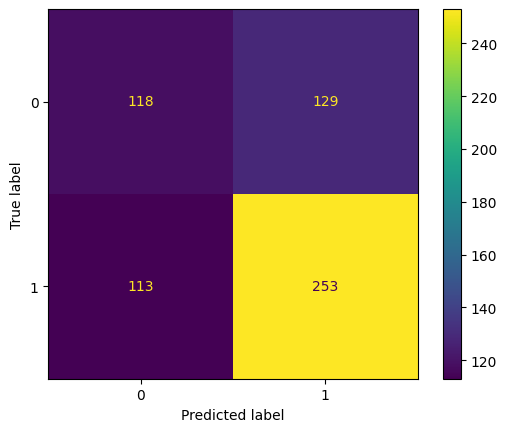

Accuracy is 60.52 %


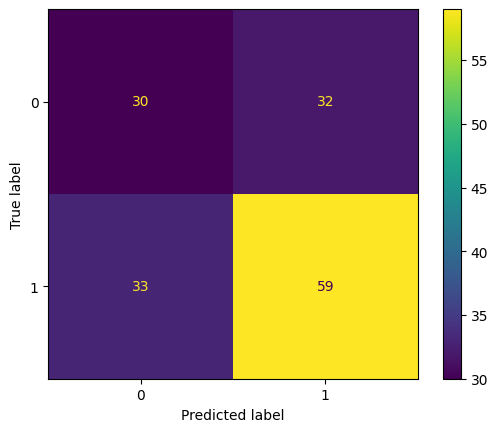

Accuracy is 57.79 %


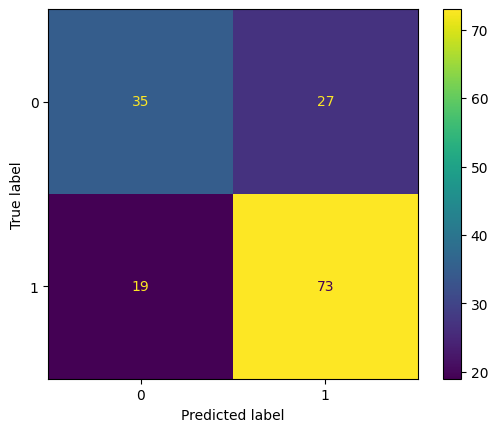

Accuracy is 70.13 %


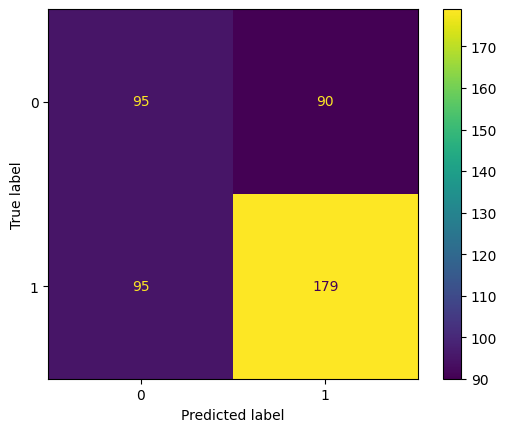

Accuracy is 59.69 %


In [ ]:
# Ploting confusion matrices for all 4 data combinations
for conf_mat, acc in zip(conf_mat_list, acc_list):

  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_)
  disp.plot()
  plt.show()

  print('Accuracy is', round(acc * 100, 2), '%')

In [ ]:
# Spark settings

!pip install pyspark --quiet

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

sc=spark.sparkContext

In [ ]:
# Loading tables with training and test data into Apache Spark
df_train = spark.read.load("features_train.csv", format = "csv", inferSchema = "true", header = "true")
df_test = spark.read.load("features_test.csv", format = "csv", inferSchema = "true", header = "true")

df_train.show(5)

+---+-------------+------+------------+-----+--------------------------------+--------------------------------+--------------------------+---------------------------+--------------------------------------+----------------------------+---------------------------+-----------------------------------------+------------------------+--------------------------+---------------------------+-------------------------+-----------------------------------------------+-----------------------------------+----------------------------+-------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------------+--------------------------+-----------------------------+----------------------+-------------------------+-------------------------------+-------------------------------+--------------------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+---

In [ ]:
# First combination - all data from the table
series_list_1 = [0, 1, 2, 3]
# Second combination - series before contrast injection
series_list_2 = [0]
# Third combination - first series after contrast injection
series_list_3 = [1]
# Fourth combination - first 3 series after contrast injection
series_list_4 = [1, 2, 3]

series_lists = [series_list_1, series_list_2, series_list_3, series_list_4]

# empty lists which will contain all combinations for train, val and test dataframe
df_train_list = []
df_test_list = []


for s_list in series_lists:
  df = df_train.filter(df_train.Series.isin(s_list))
  df = df.select(df.columns[4:])
  #df.show(5)
  df_train_list.append(df)

  df = df_test.filter(df_test.Series.isin(s_list))
  df = df.select(df.columns[4:])
  #df.show(5)
  df_test_list.append(df)

df_train_list[1].show(5)

+-----+--------------------------------+--------------------------------+--------------------------+---------------------------+--------------------------------------+----------------------------+---------------------------+-----------------------------------------+------------------------+--------------------------+---------------------------+-------------------------+-----------------------------------------------+-----------------------------------+----------------------------+-------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------------+--------------------------+-----------------------------+----------------------+-------------------------+-------------------------------+-------------------------------+--------------------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-----------------------------+-----------

In [ ]:
# Column numbers (features + labels)
print(len(df_train_list[1].columns))

75


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [ ]:
# Making a dataframe in which all features are concatenated into one vector

vec_asmbl = VectorAssembler(inputCols=df_train_list[0].columns[1:], outputCol="features") # df_train.columns[5:]

# The extension 'v' represents lists containing dataframes with vectorized features
df_train_list_v = []
df_test_list_v = []

for df_train, df_test in zip(df_train_list, df_test_list):
  df_train_v = vec_asmbl.transform(df_train).select("features", "Label")
  df_test_v = vec_asmbl.transform(df_test).select("features", "Label")

  df_train_list_v.append(df_train_v)
  df_test_list_v.append(df_test_v)

df_train_list_v[1].show(5)

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[0.01295419786580...|  1.0|
|[-0.2446305465422...|  0.0|
|[0.34147133198077...|  1.0|
|[2.31895930602150...|  1.0|
|[-0.2230591870021...|  0.0|
+--------------------+-----+
only showing top 5 rows



In [ ]:
# Feature selector - selecting the features with highest contribution to classification

from pyspark.ml.feature import VarianceThresholdSelector
from pyspark.ml.feature import ChiSqSelector

selector = VarianceThresholdSelector(varianceThreshold = 0.6, outputCol = "selectedFeatures")
#selector = ChiSqSelector(numTopFeatures=17, outputCol="selectedFeatures")

# the extension 's' represents lists containing dataframes with selected features
df_train_list_s = []
df_test_list_s = []

for df_train_v, df_test_v in zip(df_train_list_v, df_test_list_v):

  sel_model = selector.fit(df_train_v)
  df_train_s = sel_model.transform(df_train_v)
  df_train_list_s.append(df_train_s)

  df_test_s = sel_model.transform(df_test_v)
  df_test_list_s.append(df_test_s)

print("Features selected by VarianceThresholdSelector:")
df_train_list_s[1].show(5)

Features selected by VarianceThresholdSelector:
+--------------------+-----+--------------------+
|            features|Label|    selectedFeatures|
+--------------------+-----+--------------------+
|[0.01295419786580...|  1.0|[2.75213146667041...|
|[-0.2446305465422...|  0.0|[2.05593808878542...|
|[0.34147133198077...|  1.0|[4.51530476414041...|
|[2.31895930602150...|  1.0|[5.30355581033668...|
|[-0.2230591870021...|  0.0|[1.30539332523277...|
+--------------------+-----+--------------------+
only showing top 5 rows



In [ ]:
# Printing names of selected features

selected_features = np.array(df_train_list[0].columns)[sel_model.selectedFeatures]

print(sel_model.selectedFeatures)
print(selected_features)
print(len(selected_features))

[1, 2, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, 42, 46, 47, 48, 50, 55, 57, 58, 62, 63, 64, 66, 67, 70]
['original_firstorder_10Percentile' 'original_firstorder_90Percentile'
 'original_firstorder_Entropy' 'original_firstorder_InterquartileRange'
 'original_firstorder_Kurtosis'
 'original_firstorder_MeanAbsoluteDeviation' 'original_firstorder_Mean'
 'original_firstorder_Minimum'
 'original_firstorder_RobustMeanAbsoluteDeviation'
 'original_firstorder_RootMeanSquared' 'original_firstorder_Skewness'
 'original_firstorder_Uniformity' 'original_firstorder_Variance'
 'original_glcm_SumSquares' 'original_glszm_HighGrayLevelZoneEmphasis'
 'original_glszm_LargeAreaEmphasis'
 'original_glszm_LargeAreaHighGrayLevelEmphasis'
 'original_glszm_LowGrayLevelZoneEmphasis'
 'original_glszm_SmallAreaLowGrayLevelEmphasis'
 'original_glszm_ZonePercentage' 'original_glszm_ZoneVariance'
 'original_glrlm_HighGrayLevelRunEmphasis'
 'original_glrlm_LongRunEmphasis'
 'original_glrlm_LongRunHighGrayLevelEmphasis'


In [ ]:
# Extracting selected features and labels from the dataframe and renaming the
# 'selectedFeatures' column to 'features' to make final dataframes

# the extension 'f' represents lists containing final dataframes
df_train_list_f = []
df_test_list_f = []

for df_train, df_test in zip(df_train_list_s, df_test_list_s):

  df_train_f = df_train.select("selectedFeatures", "Label").withColumnRenamed('selectedFeatures', 'features')
  df_test_f = df_test.select("selectedFeatures", "Label").withColumnRenamed('selectedFeatures', 'features')

  df_train_list_f.append(df_train_f)
  df_test_list_f.append(df_test_f)


df_train_list_f[1].show(5)

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[2.75213146667041...|  1.0|
|[2.05593808878542...|  0.0|
|[4.51530476414041...|  1.0|
|[5.30355581033668...|  1.0|
|[1.30539332523277...|  0.0|
+--------------------+-----+
only showing top 5 rows



In [ ]:
# Result evaluation using AUROC
evaluator = BinaryClassificationEvaluator(labelCol='Label', metricName='areaUnderROC')

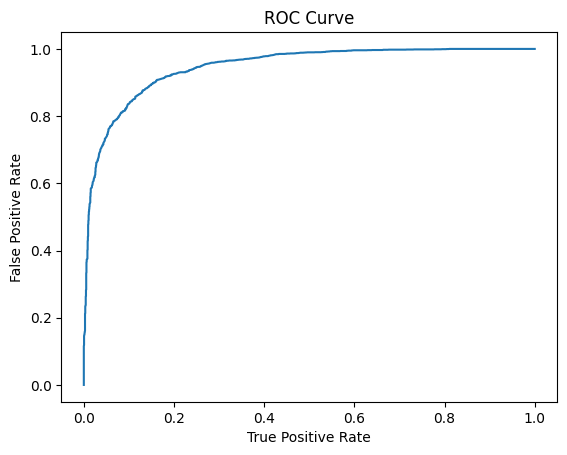

AUROC is 91.8 %
Accuracy is 87.95 %




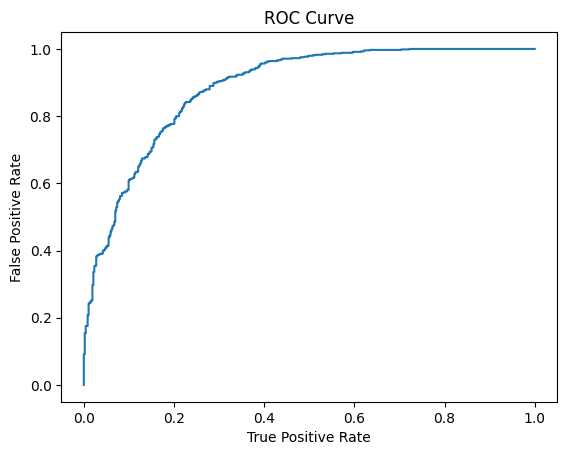

AUROC is 81.85 %
Accuracy is 81.6 %




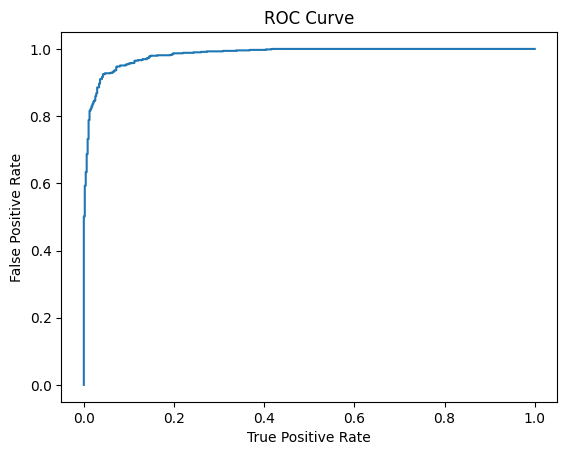

AUROC is 95.28 %
Accuracy is 93.81 %




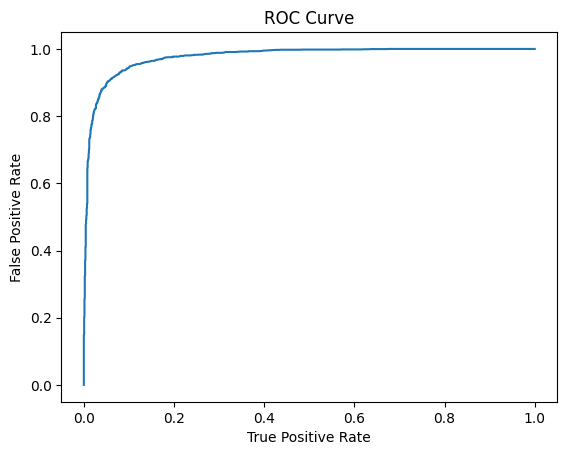

AUROC is 95.23 %
Accuracy is 92.6 %




In [ ]:
# RandomForest classification

rf = RandomForestClassifier(labelCol='Label', numTrees=200, maxDepth=5)

models = []
accs = []
aurocs = []

for df_train, df_test in zip(df_train_list_f, df_test_list_f):

  model = rf.fit(df_train)
  models.append(model)
  pred = model.transform(df_test)

  auroc = evaluator.evaluate(pred)

  trainingSummary = model.summary
  roc = trainingSummary.roc.toPandas()

  plt.plot(roc['FPR'], roc['TPR'])
  plt.ylabel('False Positive Rate')
  plt.xlabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

  print('AUROC is', round(auroc * 100, 2), '%')
  aurocs.append(auroc)

  acc = trainingSummary.accuracy
  print('Accuracy is', round(acc * 100, 2), '%')
  print("\n")
  accs.append(acc)